<a href="https://colab.research.google.com/github/FaezeM/datasets_playground/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.17.1
Using keras version 3.5.0


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(history, metric, val_prefix="val_"):
  label = metric.capitalize()
  plt.plot(history.history[metric])
  plt.plot(history.history[val_prefix+metric])
  plt.title('Model ' + label)
  plt.ylabel(label)
  plt.xlabel('Epoch')
  legend_loc = 'lower right' if metric == 'accuracy' else 'upper right'
  plt.legend(['train', 'test'], loc=legend_loc)
  plt.show()
  return

def plot_confusion_matrix(real_labels, predicted_labels, normalize=False, labels=[]):
    # Calculate confusion matrix
    c_mat = confusion_matrix(real_labels, predicted_labels)

    # Normalize confusion matrix
    cbar_label = "Number of samples"
    if normalize:
        c_mat = c_mat/c_mat.sum(axis=1)
        cbar_label = "Ratio of samples"

    # Plot the heatmap
    sns.heatmap(c_mat, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar_kws={'label': cbar_label}, xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    return

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label for 150-th image is: 9


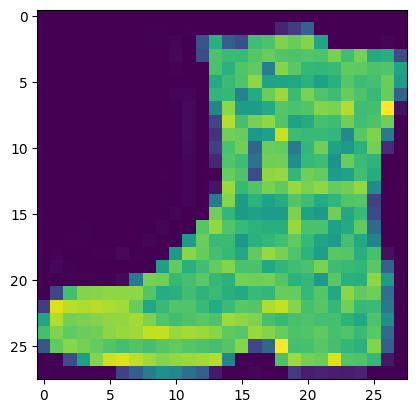

In [ ]:
def plot_image(idx, imgs, labels):
  print("Label for " + str(idx) + "-th image is: " + str(labels[idx]))
  plt.imshow(imgs[idx])
  return

plot_image(150, train_images, train_labels)  # <- change the value of the firs argument to plot another sample


In [ ]:
from sklearn.preprocessing import OneHotEncoder

nom_encoder = OneHotEncoder()

enc_train_labels = nom_encoder.fit_transform(train_labels.reshape(-1, 1)).todense()

enc_test_labels = nom_encoder.transform(test_labels.reshape(-1, 1)).todense()

imageIndex = 0
print("This is the native " + str(imageIndex) + "-th train label: " + str(train_labels[imageIndex]))
print("This is the one-hot encoding of the " + str(imageIndex) + "-th train label: " + str(enc_train_labels[imageIndex]))


This is the native 0-th train label: 9
This is the one-hot encoding of the 0-th train label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# print a sample from training set
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

Images of size 28*28, 10 classes
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6644 - loss: 6.4554 - val_accuracy: 0.7618 - val_loss: 0.8565
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7837 - loss: 0.7006 - val_accuracy: 0.8034 - val_loss: 0.6618
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8069 - loss: 0.5857 - val_accuracy: 0.7857 - val_loss: 0.6573
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8113 - loss: 0.5620 - val_accuracy: 0.7990 - val_loss: 0.6982
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8216 - loss: 0.5352 - val_accuracy: 0.8087 - val_loss: 0.5992
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8269 - loss: 0.5014 - val_accuracy: 0.8111 - val_loss: 0.6302
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8349 - loss: 0.4880 - val_accuracy: 0.8291 - val_loss: 0.5241
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8395 

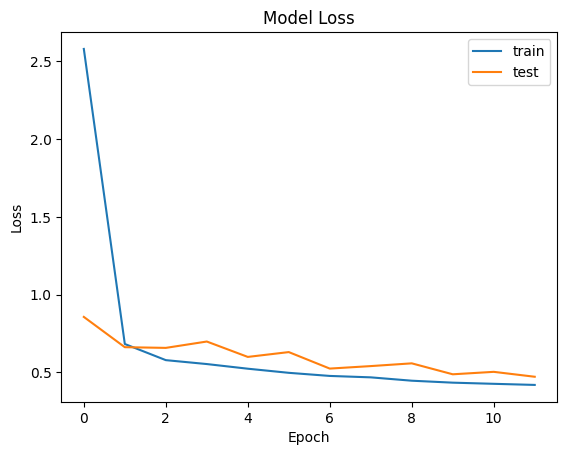

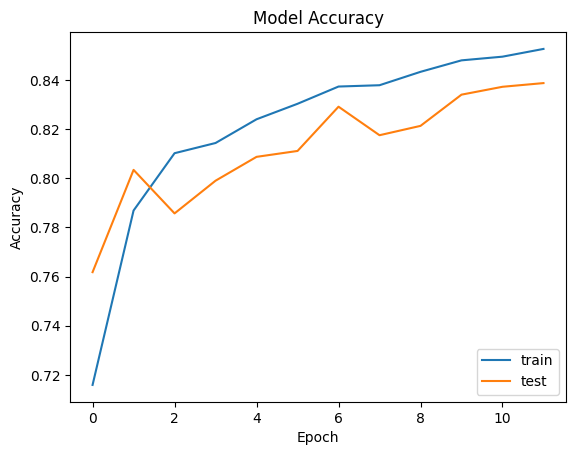

In [ ]:
def get_model(n_rows, n_cols, n_classes):

  # Initialize a Sequential model (a linear stack of layers)
  model = keras.Sequential()

  model.add(keras.layers.Input(shape=(n_rows, n_cols)))

  model.add(keras.layers.Flatten())                # <-- flatten layer

  model.add(keras.layers.Dense(64, activation='relu'))

  model.add(keras.layers.Dense(64, activation='relu'))

  model.add(keras.layers.Dense(n_classes, activation='softmax'))


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

img_rows, img_cols = train_images.shape[1], train_images.shape[2] # Assuming train_images is in shape (n_samples, img_rows, img_cols)
img_classes = enc_train_labels[0].shape[1] # The number of output classes is the size of one-hot encoding

print(f"Images of size {img_rows}*{img_cols}, {img_classes} classes")

model = get_model(img_rows, img_cols, img_classes)

history = model.fit(train_images, enc_train_labels, epochs=12, batch_size=64, shuffle=True, validation_data=(test_images, enc_test_labels))#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


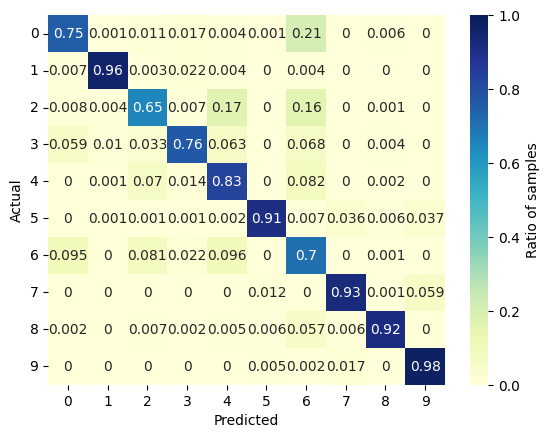

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.65      0.70      1000
           3       0.90      0.76      0.83      1000
           4       0.71      0.83      0.76      1000
           5       0.97      0.91      0.94      1000
           6       0.54      0.70      0.61      1000
           7       0.94      0.93      0.93      1000
           8       0.98      0.92      0.95      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [ ]:
predicted = model.predict(test_images)

predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=nom_encoder.categories_[0])

print(metrics.classification_report(test_labels, predicted, labels=nom_encoder.categories_[0]))


In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

scaled_train_images = scaler.fit_transform(train_images.reshape(-1, train_images.shape[-1])).reshape(train_images.shape)

scaled_test_images = scaler.transform(test_images.reshape(-1, test_images.shape[-1])).reshape(test_images.shape)


print(scaled_train_images[0])  # Print the first image's pixel values after scaling


[[-1.67504686e-01 -2.36859820e-01 -2.84355160e-01 -3.72842509e-01
  -5.20705525e-01 -6.46432020e-01 -7.29080990e-01 -8.01818718e-01
  -9.26598530e-01 -1.09935474e+00 -1.26011690e+00 -1.33850331e+00
  -1.35702329e+00 -1.31218416e+00 -1.27899372e+00 -1.39346575e+00
  -1.45411529e+00 -1.42278076e+00 -1.30790189e+00 -1.11685014e+00
  -9.50245392e-01 -8.67271808e-01 -8.02353920e-01 -7.03776276e-01
  -5.70753202e-01 -4.68491861e-01 -3.83043804e-01 -2.40167106e-01]
 [-1.67504686e-01 -2.36859820e-01 -2.84355160e-01 -3.72842509e-01
  -5.20705525e-01 -6.46432020e-01 -7.29080990e-01 -8.01818718e-01
  -9.26598530e-01 -1.09935474e+00 -1.26011690e+00 -1.33850331e+00
  -1.35702329e+00 -1.31218416e+00 -1.27899372e+00 -1.39346575e+00
  -1.45411529e+00 -1.42278076e+00 -1.30790189e+00 -1.11685014e+00
  -9.50245392e-01 -8.67271808e-01 -8.02353920e-01 -7.03776276e-01
  -5.70753202e-01 -4.68491861e-01 -3.83043804e-01 -2.40167106e-01]
 [-1.67504686e-01 -2.36859820e-01 -2.84355160e-01 -3.72842509e-01
  -5.207

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8008 - loss: 0.5655 - val_accuracy: 0.8522 - val_loss: 0.4131
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8712 - loss: 0.3540 - val_accuracy: 0.8701 - val_loss: 0.3552
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8882 - loss: 0.3052 - val_accuracy: 0.8640 - val_loss: 0.3789
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8963 - loss: 0.2799 - val_accuracy: 0.8716 - val_loss: 0.3577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9012 - loss: 0.2622 - val_accuracy: 0.8675 - val_loss: 0.3614


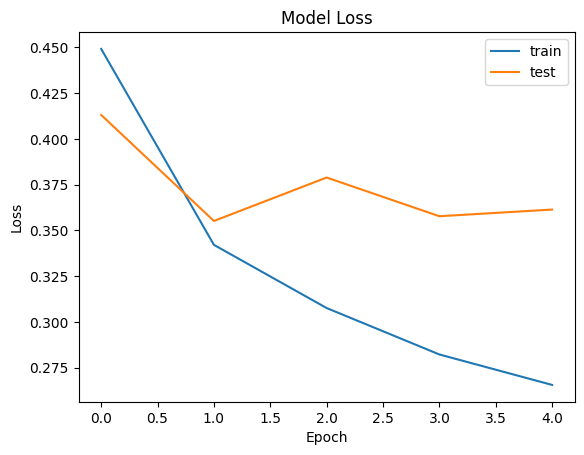

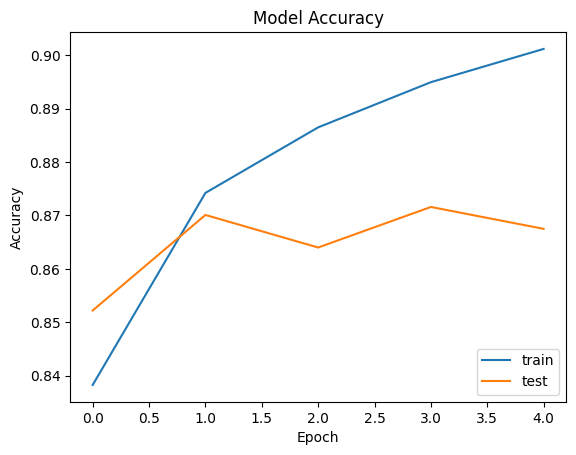

In [ ]:
model = get_model(img_rows, img_cols, img_classes)
history = model.fit(scaled_train_images, enc_train_labels, epochs=5, batch_size=32, shuffle=True, validation_data=(scaled_test_images, enc_test_labels))#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


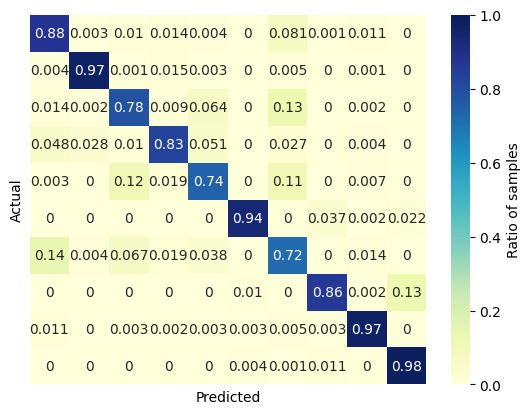

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.96      0.97      0.97      1000
           2       0.79      0.78      0.79      1000
           3       0.91      0.83      0.87      1000
           4       0.82      0.74      0.78      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.72      0.69      1000
           7       0.94      0.86      0.90      1000
           8       0.96      0.97      0.96      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:

predicted = model.predict(scaled_test_images)

predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True)

print(metrics.classification_report(test_labels, predicted))

Images of size 28*28, 10 classes
Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.1364 - loss: 38.1972 - val_accuracy: 0.2518 - val_loss: 8.1798
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2624 - loss: 6.2804 - val_accuracy: 0.3941 - val_loss: 2.6490
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4249 - loss: 2.4250 - val_accuracy: 0.5089 - val_loss: 1.8668
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5381 - loss: 1.7319 - val_accuracy: 0.5796 - val_loss: 1.5496
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5921 - loss: 1.4640 - val_accuracy: 0.6122 - val_loss: 1.3852
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6266 - loss: 1.3018 - val_accuracy: 0.6323 - val_loss: 1.2640
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6446 - loss: 1.1899 - val_accuracy: 0.6491 - val_loss: 1.1745
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.661

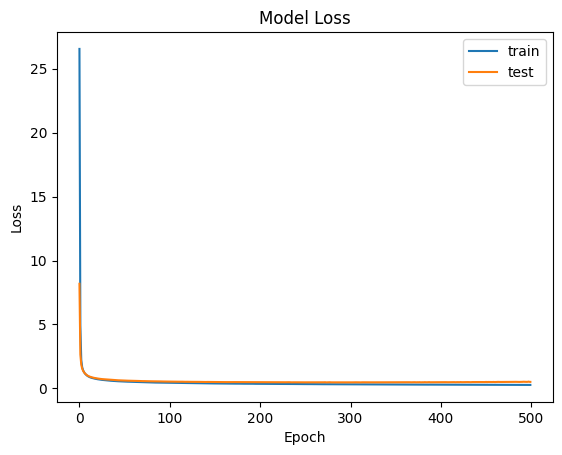

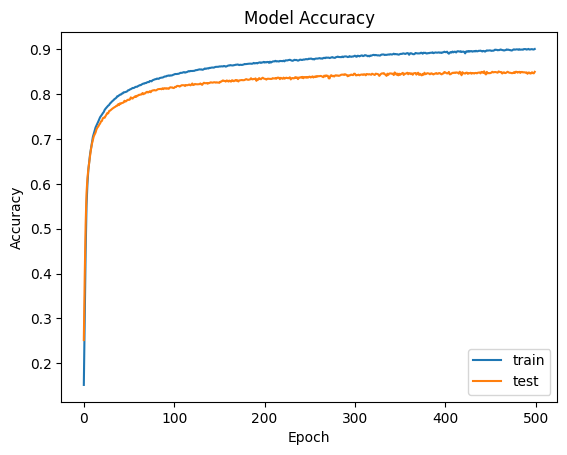

In [ ]:
def get_model(n_rows, n_cols, n_classes):
  model = keras.Sequential()


  model.add(keras.layers.Input(shape=(n_rows, n_cols, 1)))

  model.add(keras.layers.Conv2D(8, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


  model.add(keras.layers.Flatten())



  model.add(keras.layers.Dense(n_classes, activation='softmax'))


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

# Get the number of rows, columns, and classes from the training data
img_rows, img_cols = train_images.shape[1], train_images.shape[2] # Image dimensions (height x width)
img_classes = enc_train_labels[0].shape[1] # Number of output classes (based on encoded labels)

print(f"Images of size {img_rows}*{img_cols}, {img_classes} classes")

train_images_conv = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images_conv = test_images.reshape(test_images.shape[0], img_rows, img_cols,1 )

model = get_model(img_rows, img_cols, img_classes)

history = model.fit(train_images_conv, enc_train_labels, epochs=500, batch_size=4096, shuffle=True, validation_data=(test_images_conv, enc_test_labels))#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


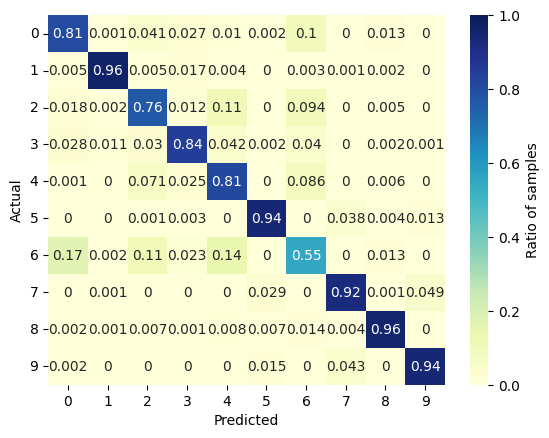

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.76      0.75      1000
           3       0.89      0.84      0.86      1000
           4       0.72      0.81      0.76      1000
           5       0.94      0.94      0.94      1000
           6       0.62      0.55      0.58      1000
           7       0.91      0.92      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
predicted = model.predict(test_images)

predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=nom_encoder.categories_[0])

print(metrics.classification_report(test_labels, predicted, labels=nom_encoder.categories_[0]))

Images of size 28*28, 10 classes
Epoch 1/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.0938 - loss: 42.4940 - val_accuracy: 0.2215 - val_loss: 9.0128
Epoch 2/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2664 - loss: 6.9763 - val_accuracy: 0.3218 - val_loss: 3.3471
Epoch 3/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3690 - loss: 2.9810 - val_accuracy: 0.4924 - val_loss: 2.0598
Epoch 4/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5268 - loss: 1.8989 - val_accuracy: 0.5853 - val_loss: 1.6107
Epoch 5/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5953 - loss: 1.5579 - val_accuracy: 0.6108 - val_loss: 1.4061
Epoch 6/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6241 - loss: 1.3603 - val_accuracy: 0.6317 - val_loss: 1.2900
Epoch 7/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6416 - loss: 1.2416 - val_accuracy: 0.6427 - val_loss: 1.2072
Epoch 8/298
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.656

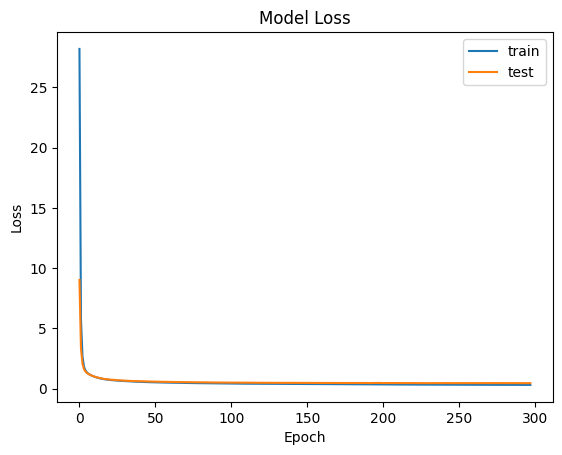

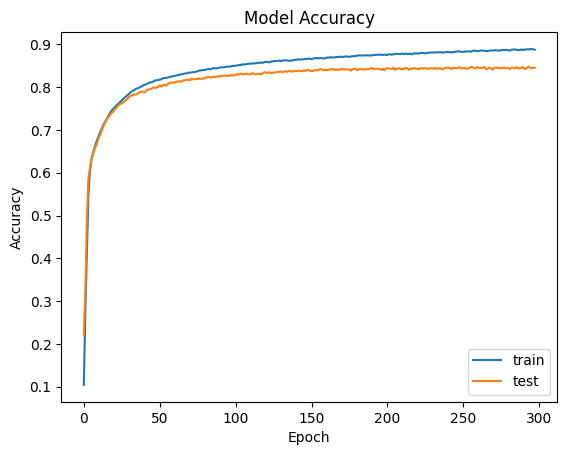

In [ ]:
def get_model(n_rows, n_cols, n_classes):
  model = keras.Sequential()

  model.add(keras.layers.Input(shape=(n_rows, n_cols, 1)))

  model.add(keras.layers.Conv2D(8, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


  model.add(keras.layers.Flatten())



  model.add(keras.layers.Dense(n_classes, activation='softmax'))


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

img_rows, img_cols = train_images.shape[1], train_images.shape[2] # Image dimensions (height x width)
img_classes = enc_train_labels[0].shape[1] # Number of output classes (based on encoded labels)

print(f"Images of size {img_rows}*{img_cols}, {img_classes} classes")


train_images_conv = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images_conv = test_images.reshape(test_images.shape[0], img_rows, img_cols,1 )

model = get_model(img_rows, img_cols, img_classes)

history = model.fit(train_images_conv, enc_train_labels, epochs=298, batch_size=4096, shuffle=True, validation_data=(test_images_conv, enc_test_labels))#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


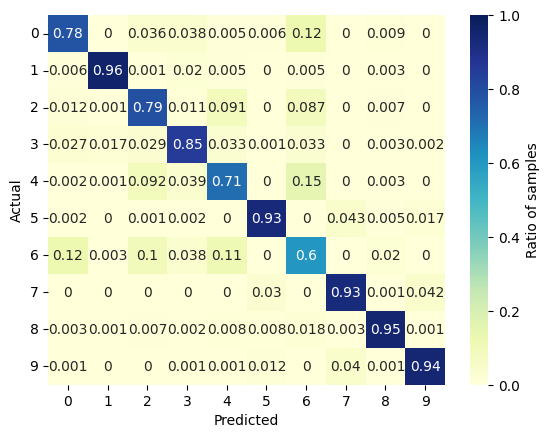

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.85      0.85      0.85      1000
           4       0.74      0.71      0.73      1000
           5       0.94      0.93      0.94      1000
           6       0.59      0.60      0.60      1000
           7       0.92      0.93      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
predicted = model.predict(test_images)

predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=nom_encoder.categories_[0])

print(metrics.classification_report(test_labels, predicted, labels=nom_encoder.categories_[0]))

Images of size 28*28, 10 classes
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5582 - loss: 2.9487 - val_accuracy: 0.7600 - val_loss: 0.6702
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.7745 - loss: 0.6225 - val_accuracy: 0.7859 - val_loss: 0.5905
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8046 - loss: 0.5446 - val_accuracy: 0.8103 - val_loss: 0.5347
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.8228 - loss: 0.4992 - val_accuracy: 0.8179 - val_loss: 0.5094
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.8313 - loss: 0.4643 - val_accuracy: 0.8270 - val_loss: 0.4891
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8413 - loss: 0.4422 - val_accuracy: 0.8275 - val_loss: 0.4813
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8445 - loss: 0.4290 - val_accuracy: 0.8294 - val_loss: 0.4759
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - a

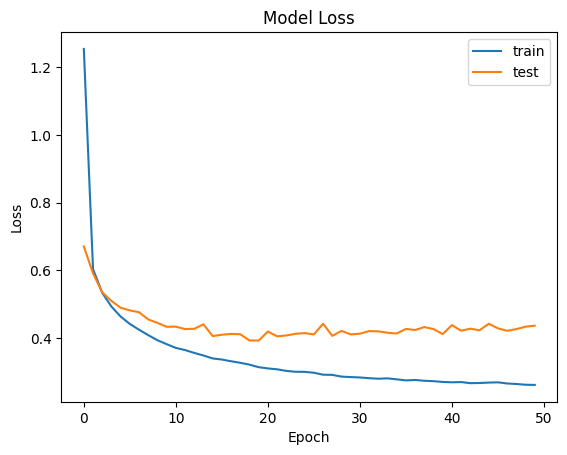

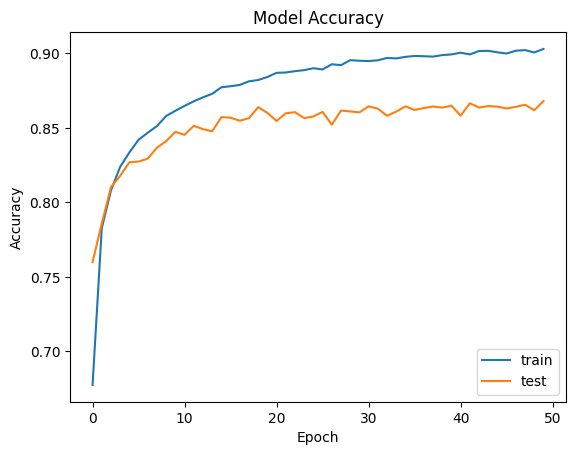

In [ ]:
def get_model(n_rows, n_cols, n_classes):
  model = keras.Sequential()

  model.add(keras.layers.Input(shape=(n_rows, n_cols, 1)))

  model.add(keras.layers.Conv2D(8, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


  model.add(keras.layers.Flatten())


  # Fully connected output layer: n_classes outputs, softmax activation for classification probabilities
  model.add(keras.layers.Dense(n_classes, activation='softmax'))

  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

img_rows, img_cols = train_images.shape[1], train_images.shape[2] # Image dimensions (height x width)
img_classes = enc_train_labels[0].shape[1] # Number of output classes (based on encoded labels)

print(f"Images of size {img_rows}*{img_cols}, {img_classes} classes")

train_images_conv = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images_conv = test_images.reshape(test_images.shape[0], img_rows, img_cols,1 )

model = get_model(img_rows, img_cols, img_classes)

history = model.fit(train_images_conv, enc_train_labels, epochs=50, batch_size=128, shuffle=True, validation_data=(test_images_conv, enc_test_labels))#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


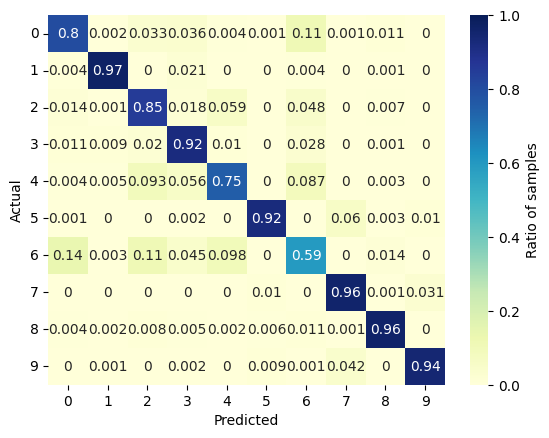

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.76      0.85      0.81      1000
           3       0.83      0.92      0.87      1000
           4       0.81      0.75      0.78      1000
           5       0.97      0.92      0.95      1000
           6       0.67      0.59      0.63      1000
           7       0.90      0.96      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
predicted = model.predict(test_images)

predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=nom_encoder.categories_[0])

print(metrics.classification_report(test_labels, predicted, labels=nom_encoder.categories_[0]))